<a href="https://colab.research.google.com/github/Precillieo/Tensorflow-Computer-Vision-/blob/main/Mnist_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [2]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [3]:
if K.image_data_format() == 'Channels_first':
  train_images= train_images.reshape(train_images.shape[0], 1, 28, 28)
  test_images= test_images.reshape(test_images.shape[0], 1, 28, 28)
  input_shape= (1,28,28)
else:
  train_images= train_images.reshape(train_images.shape[0], 28, 28, 1)
  test_images= test_images.reshape(test_images.shape[0], 28, 28, 1)
  input_shape= (28, 28, 1)


In [4]:
train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

In [5]:
train_images /= 255
test_images /= 255

In [6]:
train_labels= tf.keras.utils.to_categorical(train_labels, 10)
test_labels= tf.keras.utils.to_categorical(test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


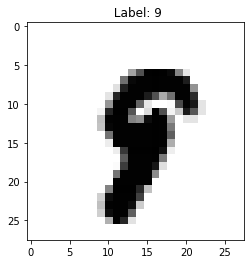

In [7]:
def display_images(number):
  print(train_labels[number])
  label= train_labels[number].argmax(axis= 0)
  image= train_images[number].reshape([28,28])
  plt.title(' Label: %d' % (label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

display_images(1235)

In [8]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation= 'softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [10]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [11]:
history= model.fit(train_images, train_labels,
                   epochs= 12, batch_size= 32,
                   verbose= 2,
                   validation_data= (test_images, test_labels))

Epoch 1/12
1875/1875 - 153s - loss: 0.1343 - accuracy: 0.9595 - val_loss: 0.0565 - val_accuracy: 0.9814
Epoch 2/12
1875/1875 - 152s - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0322 - val_accuracy: 0.9898
Epoch 3/12
1875/1875 - 151s - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0297 - val_accuracy: 0.9903
Epoch 4/12
1875/1875 - 151s - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 5/12
1875/1875 - 150s - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0309 - val_accuracy: 0.9918
Epoch 6/12
1875/1875 - 151s - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 7/12
1875/1875 - 151s - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0357 - val_accuracy: 0.9914
Epoch 8/12
1875/1875 - 151s - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0375 - val_accuracy: 0.9901
Epoch 9/12
1875/1875 - 151s - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0317 - val_accuracy: 0.9915
Epoch 10/12
1875/1875 - 152s - loss: 0.0123 - accuracy: 0.9956 -

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04201088100671768
Test accuracy: 0.991100013256073


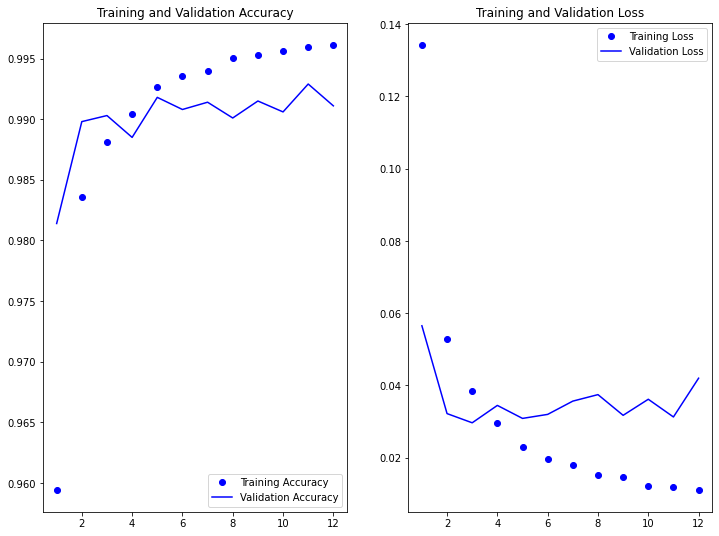

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)
#epochs_range = range(epochs)

plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc,'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()